# Whatsapp Chat Analysis

As a object of this analysis, i'm using my Whatsapp data. So I extract group chat from my Whatsapp data, exclude the media.

# 1. Import Libraries

In [1]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 2. Python function to prepare before import the data

In [2]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

# 2. Import Data

In [3]:
data = []
conversation = 'chat_data_bygroup.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

# 3. Data Preparation

In [4]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

           Date   Time                   Author  \
4200 2023-02-27  14:14  Gres Tapalisih Fortuner   
4201 2023-02-27  14:14  Gres Tapalisih Fortuner   
4202 2023-02-27  14:22     Nadia Sakulll Mantan   
4203 2023-02-27  14:22     Nadia Sakulll Mantan   
4204 2023-02-27  14:22     Nadia Sakulll Mantan   
4205 2023-02-27  14:23     Nadia Sakulll Mantan   
4206 2023-02-27  14:23  Gres Tapalisih Fortuner   
4207 2023-02-27  14:23  Gres Tapalisih Fortuner   
4208 2023-02-27  14:24     Nadia Sakulll Mantan   
4209 2023-02-27  14:24  Gres Tapalisih Fortuner   
4210 2023-02-27  14:24     Nadia Sakulll Mantan   
4211 2023-02-27  14:24  Gres Tapalisih Fortuner   
4212 2023-02-27  14:24     Nadia Sakulll Mantan   
4213 2023-02-27  14:24  Gres Tapalisih Fortuner   
4214 2023-02-27  14:24  Gres Tapalisih Fortuner   
4215 2023-02-27  14:25  Gres Tapalisih Fortuner   
4216 2023-02-27  14:25     Nadia Sakulll Mantan   
4217 2023-02-27  14:25  Gres Tapalisih Fortuner   
4218 2023-02-27  14:25     Nadi

In [5]:
total_messages = df.shape[0]
print(total_messages)

4220


In [6]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

295


In [7]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

3720


In [8]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chat in Tapalisih")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chat in Tapalisih
Total Messages:  4220
Number of Media Shared:  295
Number of Emojis Shared 3720
Number of Links Shared 5


# 4. Analyze Data

In [9]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Ester Koyo Pea", "Nadia Sakulll Mantan", "Riven",
 "Gresss makangiras tomboy kaya", "Gres Tapalisih Fortuner"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of Ester Koyo Pea -
Messages Sent 1493
Average Words per message 4.296718017414602
Media Messages Sent 48
Emojis Sent 392
Links Sent 1
Stats of Nadia Sakulll Mantan -
Messages Sent 1476
Average Words per message 4.456639566395664
Media Messages Sent 131
Emojis Sent 3102
Links Sent 0
Stats of Riven -
Messages Sent 622
Average Words per message 4.090032154340836
Media Messages Sent 61
Emojis Sent 151
Links Sent 0
Stats of Gresss makangiras tomboy kaya -
Messages Sent 78
Average Words per message 3.141025641025641
Media Messages Sent 23
Emojis Sent 12
Links Sent 0
Stats of Gres Tapalisih Fortuner -
Messages Sent 180
Average Words per message 3.316666666666667
Media Messages Sent 32
Emojis Sent 46
Links Sent 0


## 4.1 Pie Chart

In [10]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

('🤣', 2261)
('\U0001f979', 233)
('😭', 226)
('🥲', 185)
('🤩', 106)
('🥺', 102)
('😂', 99)
('🤧', 51)
('❤️', 45)
('🥳', 45)
('😰', 40)
('😍', 39)
('😢', 30)
('✨', 30)
('🥰', 27)
('🤍', 17)
('🙏', 15)
('😁', 14)
('🤗', 11)
('😆', 11)
('😒', 11)
('❤', 10)
('😪', 8)
('😠', 8)
('\U0001faf6🏽', 6)
('😊', 5)
('😨', 5)
('😘', 5)
('😝', 5)
('✌🏻', 5)
('\U0001fae3', 5)
('\U0001faf6🏻', 5)
('😱', 5)
('💖', 4)
('🙄', 4)
('✅', 4)
('😇', 3)
('👏', 3)
('😤', 3)
('🎄', 2)
('😏', 2)
('😅', 2)
('🥴', 2)
('🙏🏽', 2)
('😚', 2)
('🤤', 2)
('👏🏽', 2)
('☃️', 1)
('⛄', 1)
('🔪', 1)
('🙃', 1)
('❣️', 1)
('🗓', 1)
('🕑', 1)
('📍', 1)
('\U0001fae1', 1)
('😎', 1)
('💗', 1)
('😔', 1)
('🥵', 1)


## 4.2 Word Cloud

There are 101148 words in all the messages.


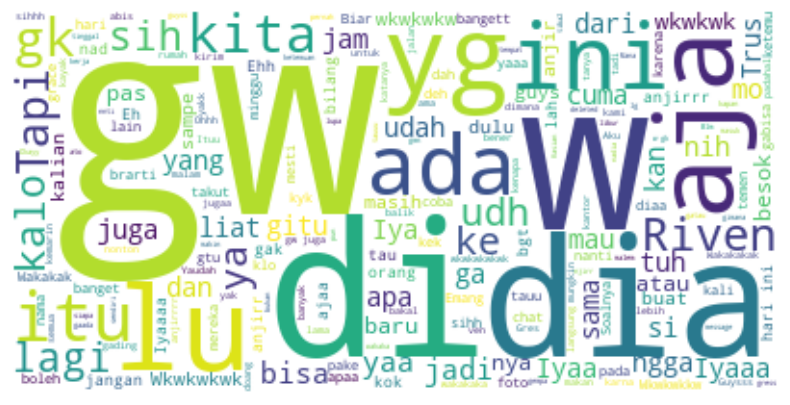

In [11]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4.3 Word Cloud by each person

Author name Ester Koyo Pea


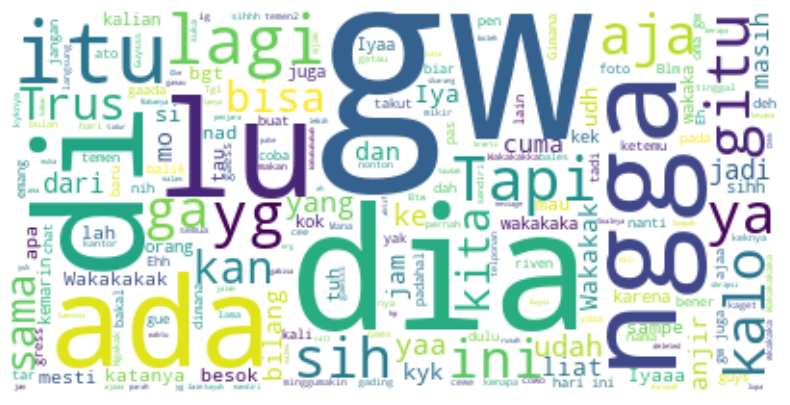

Author name Nadia Sakulll Mantan


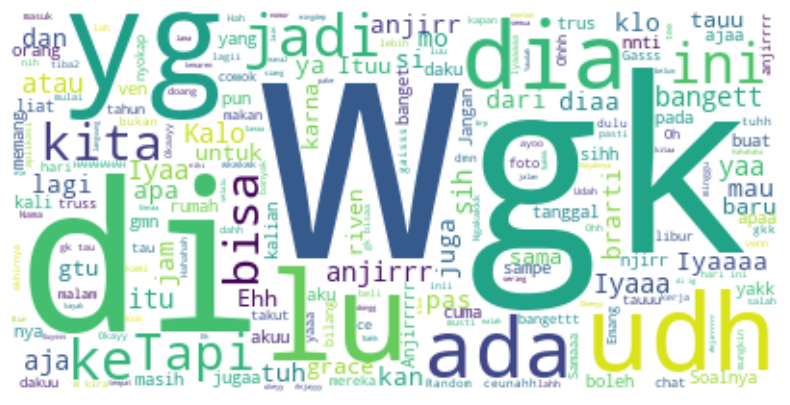

Author name Riven


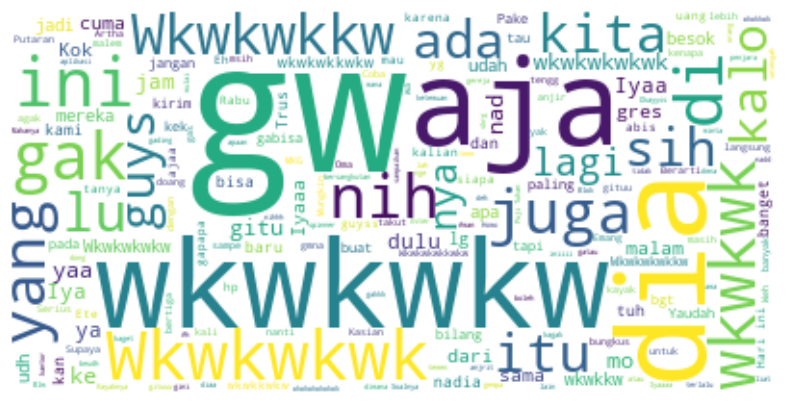

Author name Gresss makangiras tomboy kaya


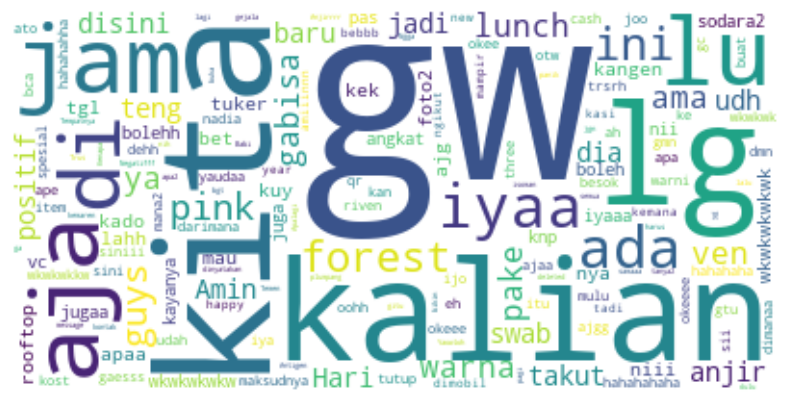

Author name Gres Tapalisih Fortuner


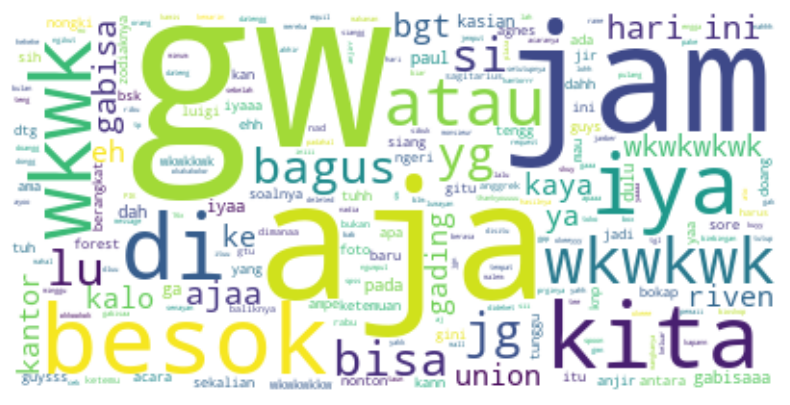

In [14]:
l = ["Ester Koyo Pea", "Nadia Sakulll Mantan", "Riven",
 "Gresss makangiras tomboy kaya", "Gres Tapalisih Fortuner"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

# Conclusion

The conclusion from this analysis is that in this group chat there are 4220 chats with 295 media, 3720 chats in  emojis and 5 in links.
Ester Koyo Pea is the person who sends the most messages in text, Nadia Sakulll Former sends the most chats in the form of emojis, and Gres Tapalisih Fortuner has the least number of chats.